In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from random import choice
from typing import *
from joblib import Parallel, delayed

Single neuron

In [2]:
inputs = [1.2, 5.1, 2.1]

In [3]:
weights = [3.1, 2.1, 8.7]

In [4]:
bias = 3

In [5]:
output = sum([i * w for i, w in zip(inputs, weights)]) + bias

In [6]:
output

35.7

In [7]:
np.dot(inputs, weights) + bias

35.7

Layer of neurons, inputs same, weights and bias unique to each neuron

In [45]:
weights = [[3.1, 2.1, 8.7], [4.2, 6.7, 9.1]]#, [0.1, 2.3, 5.8], [3.5, 2.7, 9.2]]
biases = [3, 1]#, 9]

In [46]:
layer_outputs = [np.dot(inputs, weights[i]) + biases[i] for i in range(len(biases))]
layer_outputs

[35.7, 59.32]

In [48]:
np.array(weights)

array([[3.1, 2.1, 8.7],
       [4.2, 6.7, 9.1]])

In [49]:
np.array(weights).shape

(2, 3)

In [2]:
class Layer:
    def __init__(self, weights, biases):
        self.weights = weights.astype(np.float32)
        self.biases = biases.astype(np.float32)
        
    def get_output(self, inputs):
        return [np.dot(inputs.astype(np.float32), self.weights[i]) + self.biases[i] for i in range(len(self.biases))]
    
    def __del__(self):
        del self.weights
        del self.biases

In [28]:
l = Layer(np.array(weights), np.array(biases))

In [32]:
l.get_output(np.array(inputs))

[35.7, 59.32, 33.03]

In [3]:
def create_random_layer(n_neurons, n_inputs):
    return Layer(
        weights=(np.random.rand(n_neurons, n_inputs) * 10)  - 5,
        biases=(np.random.rand(n_neurons) * 10) - 5
    )

In [97]:
lr = create_random_layer(n_neurons=2, n_inputs=3)
print(lr.weights)
print(lr.biases)

[[-1.08383258 -0.91270088  1.13258546]
 [ 2.82811154  1.44479022  3.44246238]]
[ 2.1794636  -3.26099868]


In [89]:
lr.get_output(inputs)

[24.1149255690157, 6.382199109248088]

In [231]:
mnist_dataset = load_digits()

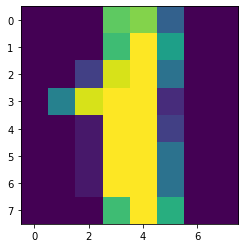

In [232]:
dataset = mnist_dataset["data"]

plt.imshow(dataset[1].reshape(8, 8))

In [233]:
targets = mnist_dataset["target"]

In [4]:
def get_data_choice(target_val: int):
    return dataset[choice(np.where(targets == target_val)[0])]

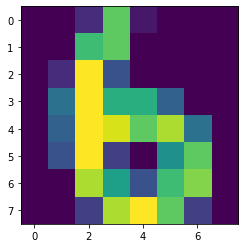

In [235]:
plt.imshow(get_data_choice(6).reshape(8, 8))

In [5]:
class Network:
    def __init__(
        self,
        input_layer: Layer,
        dense_layers: List[Layer],
        output_layer: Layer,
        input_scaler: str = None,
        output_scaler: str = None
    ):
        self.input_layer = input_layer
        self.dense_layers = dense_layers
        self.output_layer = output_layer
        
        if input_scaler == "minmax":
            self.input_scaler = MinMaxScaler((0, 1))
        if output_scaler == "minmax":
            self.output_scaler = MinMaxScaler((0, 1))
    
    def predict(self, input_data) -> np.ndarray:
        input_data = self.input_scaler.fit_transform(input_data.reshape(-1, 1)).ravel()
        previous_output = self.input_layer.get_output(input_data)
        
        for l in dense_layers:
            previous_output = l.get_output(previous_output)
            
        output = np.array(output_layer.get_output(previous_output))
        return self.output_scaler.fit_transform(output.reshape(-1, 1)).ravel()
    
    def __del__(self):
        del self.input_layer
        for dl in self.dense_layers:
            del dl
        del self.output_layer

In [517]:
n_models = 1000
losses = list()
models: List[dict] = list()

for _nm in tqdm(range(n_models)):
    input_layer = create_random_layer(n_neurons=128, n_inputs=64)
    dense_layers = [create_random_layer(n_neurons=128, n_inputs=128) for i in range(10)]
    output_layer = create_random_layer(n_neurons=10, n_inputs=128)
    
    _losses = list()
    for target in range(10):
        input_data = get_data_choice(target)

        network = Network(input_layer, dense_layers, output_layer, input_scaler="minmax", output_scaler="minmax")
        output = network.predict(input_data)

        target_output = np.zeros(10)
        target_output[target] = 1

        loss = euclidean(target_output, output)
        _losses.append(loss)
        
    losses.append(np.median(_losses))
    
    models.append(
        {
            "network": network,
            # "input_layer": input_layer, 
            # "dense_layers": dense_layers,
            # "output_layer": output_layer,
            "input_data": input_data,
        }
    )

100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.65it/s]


In [6]:
n_models  = 5_000

models = list()
for i in tqdm(range(n_models)):
    input_layer = create_random_layer(n_neurons=128, n_inputs=64)
    dense_layers = [create_random_layer(n_neurons=128, n_inputs=128) for i in range(10)]
    output_layer = create_random_layer(n_neurons=10, n_inputs=128)
    
    network = Network(
        input_layer, 
        dense_layers, 
        output_layer, 
        input_scaler="minmax", 
        output_scaler="minmax"
    )
    
    models.append(network)

100%|███████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1171.57it/s]


In [7]:
del models[100:4000]

In [8]:
len(models)

1100

In [9]:
import sys
import gc

In [10]:
sys.getrefcount(models[1])

2

In [12]:
m = models[0]

In [14]:
del models[0]

In [16]:
del m

In [17]:
gc.get_referrers(models[0])

[[<__main__.Network at 0x7f9d406ab190>,
  ...]]

In [ ]:
sys.g

In [ ]:
sys.getref

In [11]:
del models[1]

182
1.4649888050592637


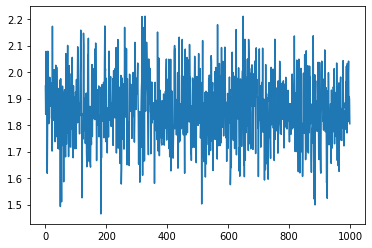

In [518]:
plt.plot(losses)
print(np.argmin(losses))
print(np.min(losses))

In [519]:
models[182]["scaled_output"]

array([0.53760497, 0.65991912, 0.80917796, 1.        , 0.        ,
       0.58581084, 0.67564828, 0.83974648, 0.86217947, 0.41531825])

In [539]:
def test_model(index: int):
    network = models[index]["network"]
    
    fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(8, 4), constrained_layout=True)
    
    for target, ax in zip(range(10), map(lambda ix: axs[ix], product(range(2), range(5)))):
        input_data = get_data_choice(target)

        network = Network(input_layer, dense_layers, output_layer, input_scaler="minmax", output_scaler="minmax")
        output = network.predict(input_data)
    
        ax.set_title(f"predicted: {np.argmax(output)}")
        ax.imshow(input_data.reshape(8, 8))
    plt.show()

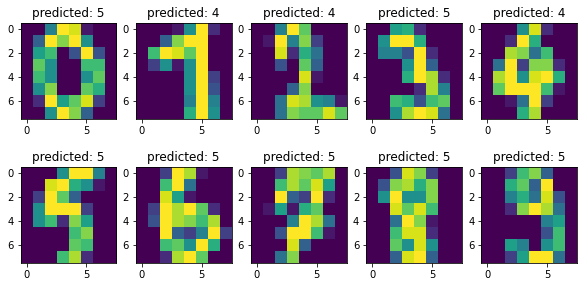

In [541]:
test_model(182)